## <font color=green> Análise de dados de reclamações dos consumidores no Brasil

fonte: http://dados.mj.gov.br/dataset/reclamacoes-do-consumidor-gov-br

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False

- Listando os datasets de cada mês

In [3]:
lst_files = sorted(os.listdir('datasets/gov'))
lst_files

['2020-01.csv',
 '2020-02.csv',
 '2020-03.csv',
 '2020-04.csv',
 '2020-05.csv',
 '2020-06.csv',
 '2020-07.csv',
 '2020-08.csv',
 '2020-09.csv',
 '2020-10.csv',
 '2020-11.csv',
 '2020-12.csv']

- Vamos carrega o dataset de cada mês e concatená-los em um único dataframe

In [4]:
dataset = pd.DataFrame()
for curr_file in lst_files:
    df_temp = pd.read_csv('datasets/gov/'+curr_file, sep=';', encoding='latin1')
    dataset = pd.concat([dataset, df_temp], ignore_index=True)

- Visualizando um amostra do dataset

In [5]:
dataset.head(3).T

,0,1,2
Região,S,S,SE
UF,PR,PR,ES
Cidade,Curitiba,São José dos Pinhais,Serra
Sexo,F,F,M
Faixa Etária,entre 31 a 40 anos,entre 21 a 30 anos,entre 41 a 50 anos
Data Finalização,01/01/2020,01/01/2020,03/01/2020
Tempo Resposta,10.0,10.0,9.0
Nome Fantasia,Itaucard,Tim,SKY
Segmento de Mercado,"Bancos, Financeiras e Administradoras de Cartão","Operadoras de Telecomunicações (Telefonia, Int...","Operadoras de Telecomunicações (Telefonia, Int..."
Área,Serviços Financeiros,Telecomunicações,Telecomunicações


### Qual a região com mais reclamações?

<Axes: ylabel='UF'>

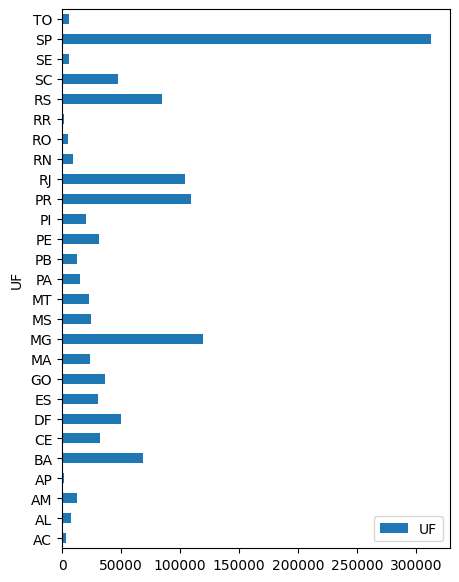

In [6]:
dataset.groupby('UF')[['UF']].count().plot.barh(rot=0, figsize=(5,7))

### Qual a quantidade de reclamações por sexo?

In [7]:
dataset['Sexo'].value_counts()

Sexo
M    670388
F    525948
O       274
Name: count, dtype: int64

- O valor 'O' está relacionado aos consumidores que não informaram o seu gênero.

<Axes: xlabel='Sexo'>

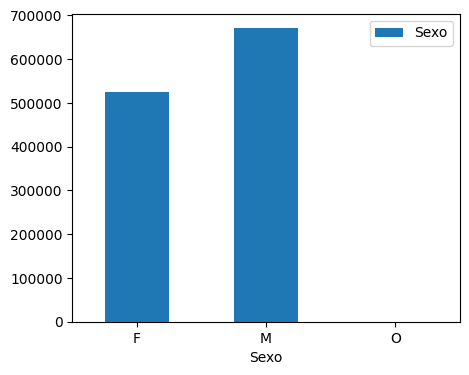

In [8]:
dataset.groupby('Sexo')[['Sexo']].count().plot.bar(rot=0, figsize=(5,4))

### Faixa etária de consumidores por sexo


In [9]:
dataset.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    154614
      entre 21 a 30 anos    129902
      entre 41 a 50 anos     86966
      entre 51 a 60 anos     68044
      entre 61 a 70 anos     53393
      mais de 70 anos        23095
      até 20 anos             9934
M     entre 31 a 40 anos    232183
      entre 21 a 30 anos    179533
      entre 41 a 50 anos    114923
      entre 51 a 60 anos     63495
      entre 61 a 70 anos     46250
      mais de 70 anos        21443
      até 20 anos            12561
O     entre 21 a 30 anos        90
      entre 31 a 40 anos        72
      entre 41 a 50 anos        37
      entre 61 a 70 anos        28
      entre 51 a 60 anos        23
      mais de 70 anos           13
      até 20 anos               11
Name: count, dtype: int64

<Axes: ylabel='Sexo,Faixa Etária'>

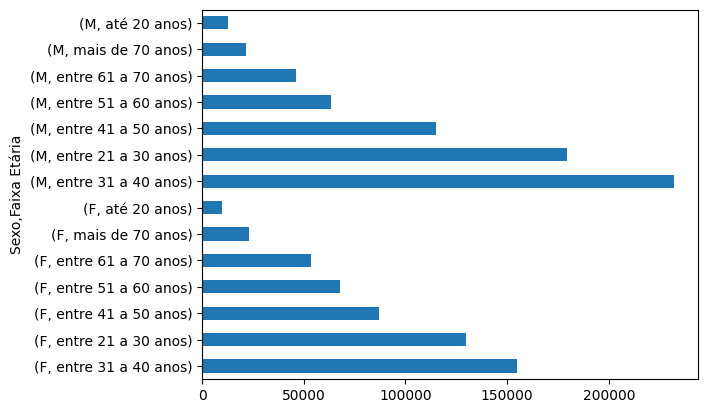

In [10]:
dataset[dataset['Sexo']!='O'].groupby('Sexo')['Faixa Etária'].value_counts().plot.barh()

### Consumidores mais jovens contratam serviços pela internet?

<Axes: ylabel='Faixa Etária,Como Comprou Contratou'>

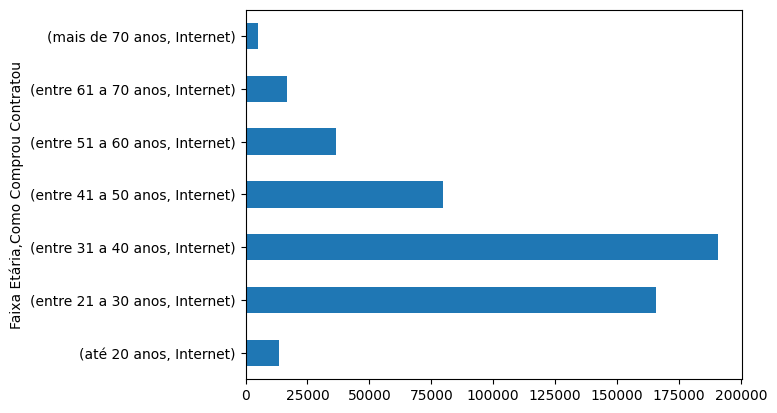

In [11]:
df2 = dataset[dataset['Como Comprou Contratou']=='Internet']
df2.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()

### Estes consumidores procuram a empresa antes de registrar uma reclamação?

<Axes: xlabel='Procurou Empresa'>

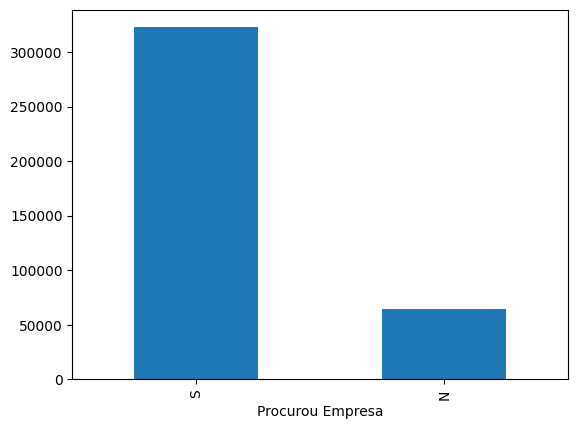

In [12]:
df2 = dataset[dataset['Faixa Etária']=='entre 31 a 40 anos']
df2['Procurou Empresa'].value_counts().plot.bar()

### Qual o grupo de problema mais comum ?


<Axes: ylabel='Grupo Problema'>

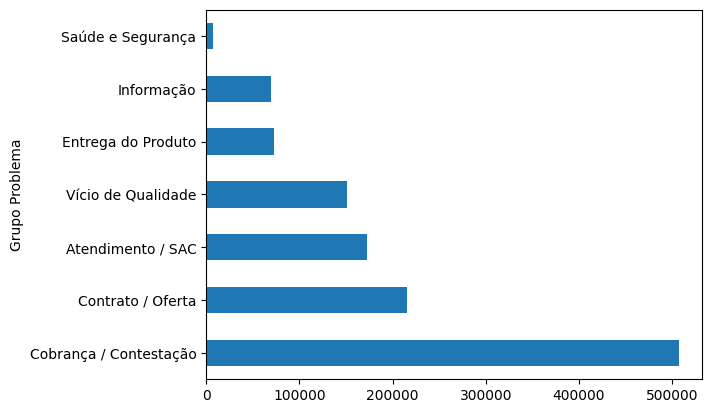

In [13]:
dataset['Grupo Problema'].value_counts().plot.barh()

In [14]:
dataset[dataset['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Problema
Cobrança indevida / abusiva para alterar ou cancelar o contrato                                           94831
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      84757
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            78510
Cobrança de tarifas, taxas, valores não previstos / não informados                                        45382
Cobrança após cancelamento do serviço                                                                     24940
Renegociação / parcelamento de dívida                                                                     23374
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                      21823
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                         19334
Dificuldade para obter boleto de quitação ou informações acerca de cálculos, pagamentos, saldo 

### Qual a quantidade de reclamações por segmento de mercado?

In [15]:
dataset['Segmento de Mercado'].value_counts()

Segmento de Mercado
Bancos, Financeiras e Administradoras de Cartão                            320887
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    318248
Comércio Eletrônico                                                        119344
Transporte Aéreo                                                            65503
Bancos de Dados e Cadastros de Consumidores                                 53173
Empresas de Intermediação de Serviços / Negócios                            48656
Energia Elétrica                                                            41520
Empresas de Pagamento Eletrônico                                            39365
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       23645
Viagens, Turismo e Hospedagem                                               17379
Viagens, Turismo, Hospedagem e Entretenimento                               15748
Corretoras e Sociedades de Seguros, Capitalização e Previdência             15

/home/andre/Dropbox/Backup/Documentos/Data Science/teaching-data-science/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


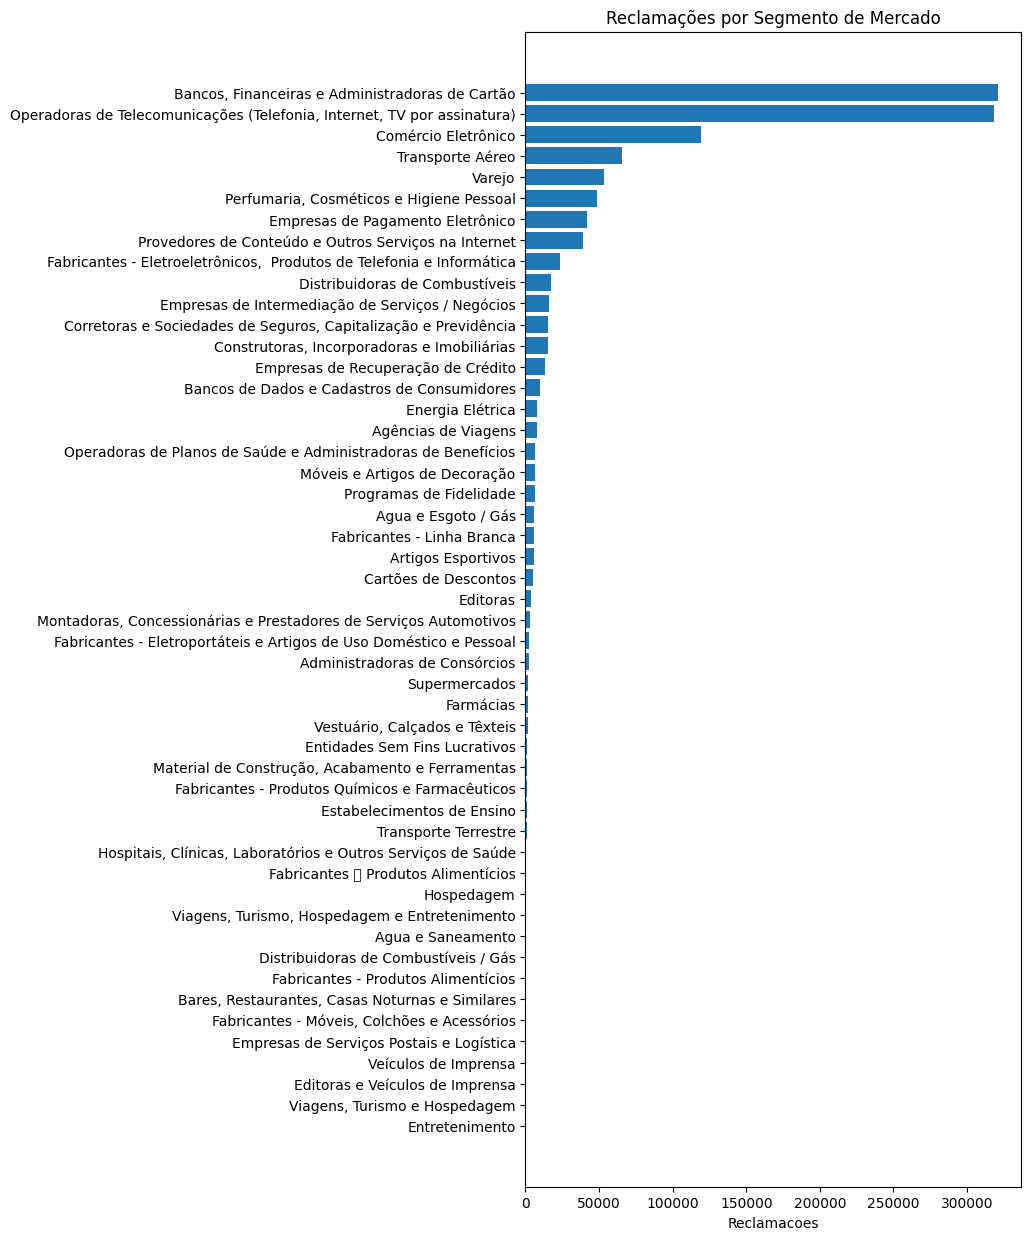

In [16]:
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Reclamações por Segmento de Mercado')

fig.set_figheight(15)
plt.show()

### Top 20 das empresas com mais reclamações

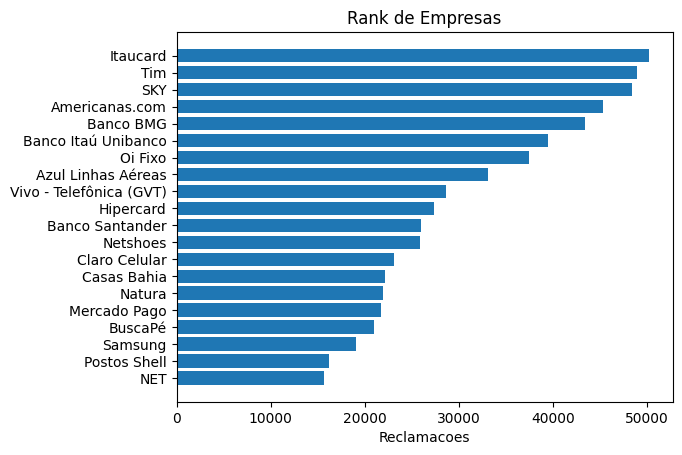

In [17]:
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

### O tempo de resposta tem alguma correlação com a nota do consumidor?

In [18]:
df = dataset.drop('Total',axis=1)
corr = df[['Tempo Resposta', 'Nota do Consumidor']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.148999
Nota do Consumidor,-0.148999,1.000000


### Frequência das notas dos consumidores

<Axes: ylabel='Frequency'>

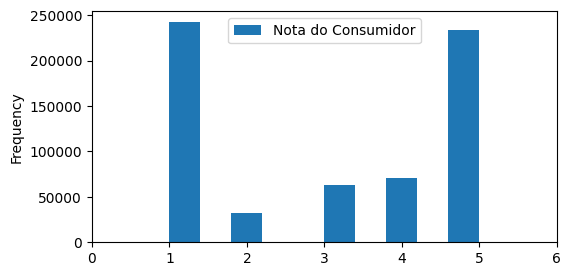

In [19]:
dataset.plot.hist(y='Nota do Consumidor',xlim=[0,6],figsize=[6,3])

### Quantos dias a empresa leva para responder o cliente?

<Axes: ylabel='Density'>

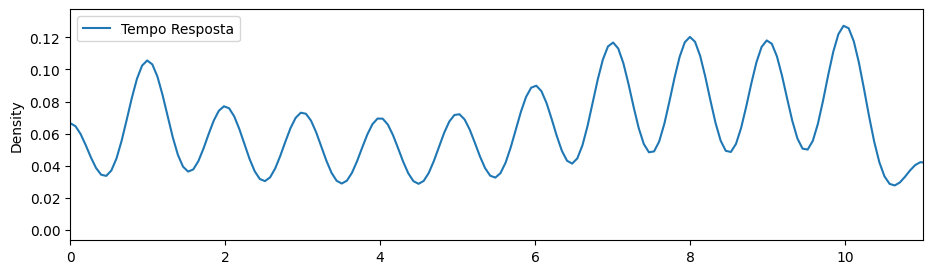

In [20]:
dataset.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[11,3])

### Proporção de reclamações resolvidas, não avaliadas e não resolvidas

In [21]:
x = dataset.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

df = dataset[dataset['Segmento de Mercado'].isin(x.keys())]

In [22]:
df['Avaliação Reclamação'].unique()

array(['Não Avaliada', 'Não Resolvida', 'Resolvida', 'Não avaliada'],
      dtype=object)

- Tratando uniformizando os valores correspondentes as avaliações de revlamações não avalidos

In [23]:
df['Avaliação Reclamação'] = df['Avaliação Reclamação'].apply(lambda x: 'Não Avaliada' if x=='Não avaliada' else x)

/tmp/ipykernel_1065347/2873182191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avaliação Reclamação'] = df['Avaliação Reclamação'].apply(lambda x: 'Não Avaliada' if x=='Não avaliada' else x)


In [24]:
df_solved = df[df['Avaliação Reclamação']=='Resolvida']
solved = df_solved.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

df_not_solved = df[df['Avaliação Reclamação']=='Não Resolvida']
not_solved = df_not_solved.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

df_not_assessed = df[df['Avaliação Reclamação']=='Não Avaliada']
not_assessed = df_not_assessed.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

/home/andre/Dropbox/Backup/Documentos/Data Science/teaching-data-science/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  func(*args, **kwargs)
/home/andre/Dropbox/Backup/Documentos/Data Science/teaching-data-science/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


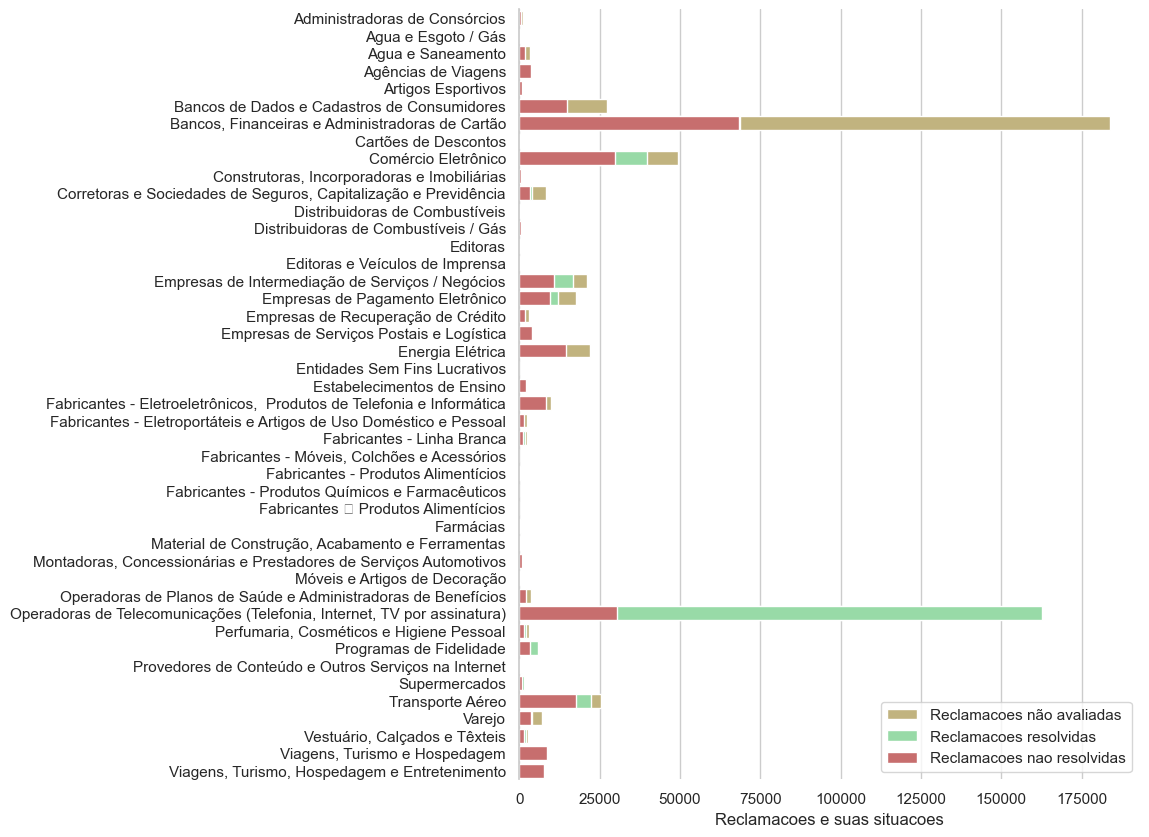

In [25]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.barplot(x=not_assessed.values, y=not_assessed.keys(), label="Reclamacoes não avaliadas", color="y")

sns.set_color_codes("pastel")
sns.barplot(x=solved.values, y=solved.keys(), label="Reclamacoes resolvidas", color="g")

sns.set_color_codes("muted")
sns.barplot(x=not_solved.values, y=not_solved.keys(),label="Reclamacoes nao resolvidas", color="r")

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

- Proporcionalmente podemos observar que as reclamações das operadoras de telecomunicações são as mais resolvidas
- As instituições financeiras são as que mais recebem reclamações e são as que mais possuem reclamações não avaliadas


### Dentro das instituições financeiras quais são os serviços que possuem o maior número de reclamações?

<Axes: ylabel='Assunto'>

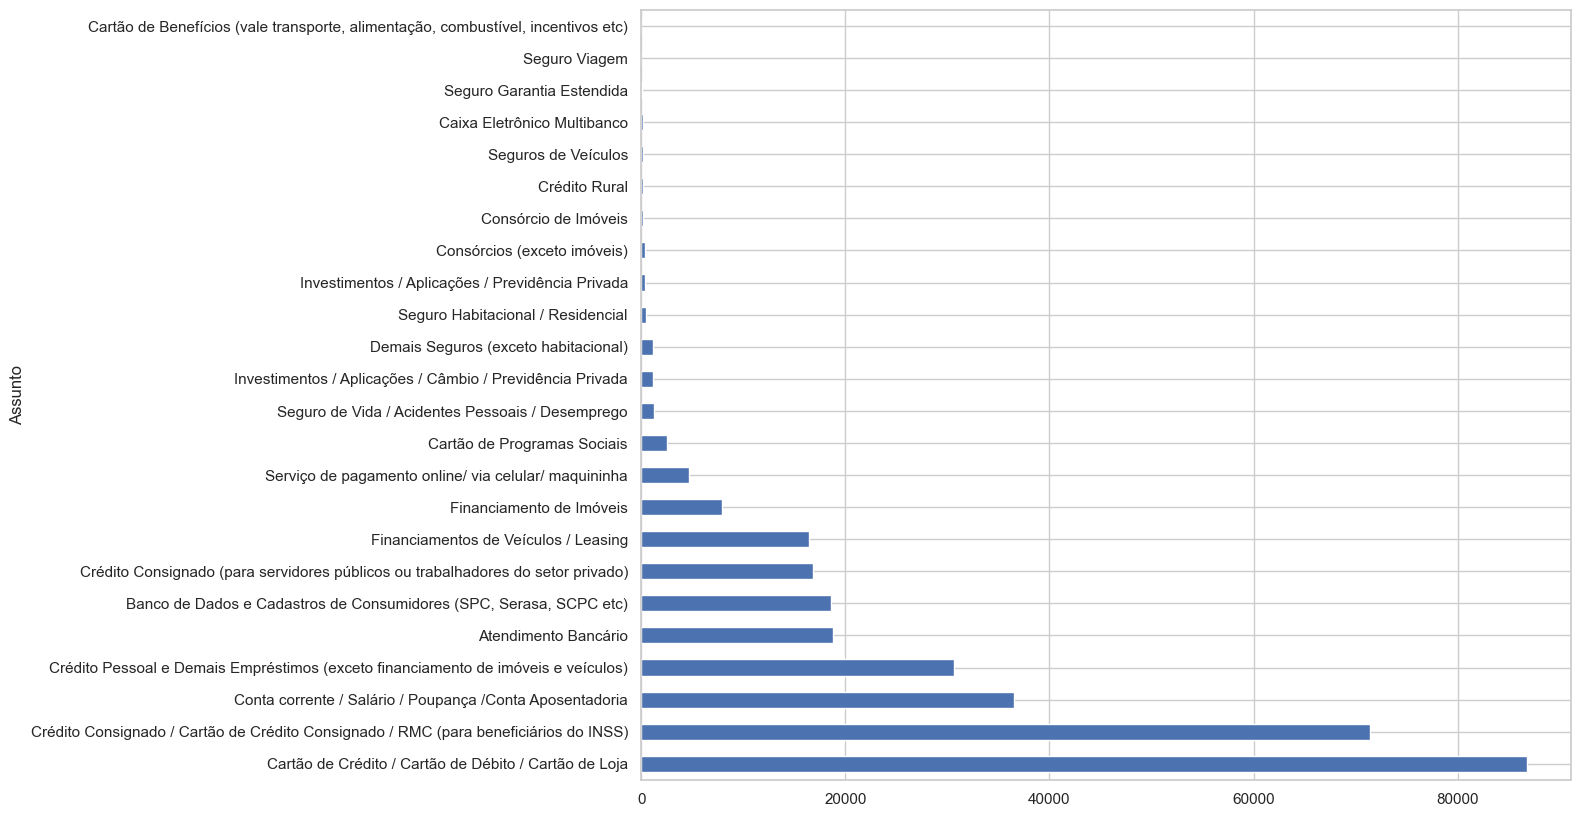

In [26]:
df = dataset[dataset['Segmento de Mercado']=='Bancos, Financeiras e Administradoras de Cartão']
df = df[df['Área']=='Serviços Financeiros']

df['Assunto'].value_counts().plot.barh(figsize=(12,10))